1. Load the dataset and display the first 10 rows.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/StudentsPerformance.csv')

df.head(10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


2. Print the column names and check the data types of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3. Descriptive statistics for all numerical columns

In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


4. Check if there are any missing or null values in the dataset.

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


5. Add a new column named average_score that calculates the average of math, reading, and writing scores for each student.

In [ ]:
df['average_score'] = (df['math_score'] +	df['reading_score']	 + df['writing_score'])/3

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


6. Create a new column called performance_level that classifies students as:

     “High” if average score ≥ 85

     “Medium” if 60 ≤ average score < 85

     “Low” if average score < 60

In [ ]:
def classify_performance(score):
    if score >= 85:
        return 'High'
    elif score >= 60:
        return 'Medium'
    else:
        return 'Low'

df['performance_level'] = df['average_score'].apply(classify_performance)

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Medium
1,female,group C,some college,standard,completed,69,90,88,82.333333,Medium
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Low
4,male,group C,some college,standard,none,76,78,75,76.333333,Medium


7. Add a column named pass_math that shows Yes if math score ≥ 50, else No.

In [ ]:
df['pass_math'] = df['math_score'].apply(lambda x: 'yes' if x >= 50 else 'No' )

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_level,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Medium,yes
1,female,group C,some college,standard,completed,69,90,88,82.333333,Medium,yes
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Low,No
4,male,group C,some college,standard,none,76,78,75,76.333333,Medium,yes


8. Use NumPy to calculate the mean, median, and standard deviation of each subject score.

In [38]:
print(df['math_score'].mean())
print(df['math_score'].median())
print(df['math_score'].std())

print(df['reading_score'].mean())
print(df['reading_score'].median())
print(df['reading_score'].std())

print(df['writing_score'].mean())
print(df['writing_score'].median())
print(df['writing_score'].std())

66.089
66.0
15.163080096009468
69.169
70.0
14.60019193725222
68.054
69.0
15.195657010869642


9. Use groupby to calculate the average scores in each subject by gender.

In [41]:
average_scores_by_gender = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()


average_scores_by_gender

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


10. Use groupby to find average scores by parental level of education.

In [42]:
avg_scores_by_parental_level = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()

avg_scores_by_parental_level

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


11. Use value_counts() to find how many students fall into each performance level.

In [43]:
pd.value_counts(df['performance_level'])

<ipython-input-43-4a3c9a47413d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['performance_level'])


,count
performance_level,
Medium,599
Low,285
High,116


12.Create a list of students who scored below 40 in any subject.

In [47]:
students_below_40 = df[(df['math_score'] < 40) |
                       (df['reading_score'] < 40) |
                       (df['writing_score'] < 40)]

students_below_40_list = students_below_40.to_dict('records')

for i, student in enumerate(students_below_40_list):
    print(f"Student {i+1}: {student}")

Student 1: {'gender': 'male', 'race/ethnicity': 'group B', 'parental_level_of_education': 'some college', 'lunch': 'free/reduced', 'test_preparation_course': 'none', 'math_score': 40, 'reading_score': 43, 'writing_score': 39, 'average_score': 40.666666666666664, 'performance_level': 'Low', 'pass_math': 'No'}
Student 2: {'gender': 'female', 'race/ethnicity': 'group B', 'parental_level_of_education': 'high school', 'lunch': 'free/reduced', 'test_preparation_course': 'none', 'math_score': 38, 'reading_score': 60, 'writing_score': 50, 'average_score': 49.333333333333336, 'performance_level': 'Low', 'pass_math': 'No'}
Student 3: {'gender': 'female', 'race/ethnicity': 'group B', 'parental_level_of_education': 'some high school', 'lunch': 'free/reduced', 'test_preparation_course': 'none', 'math_score': 18, 'reading_score': 32, 'writing_score': 28, 'average_score': 26.0, 'performance_level': 'Low', 'pass_math': 'No'}
Student 4: {'gender': 'male', 'race/ethnicity': 'group D', 'parental_level_of

13. Plot a histogram of math scores.

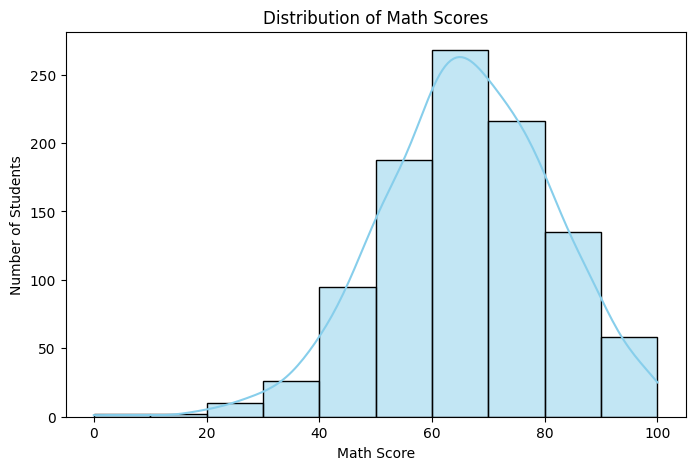

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['math_score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.show()


14. Create a boxplot comparing math scores across different gender groups


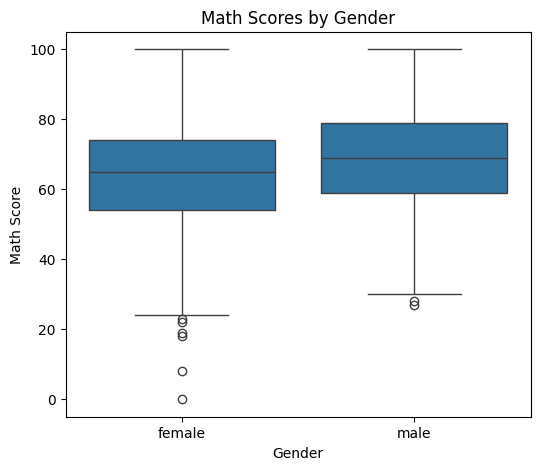

In [53]:
plt.figure(figsize=(6,5))
sns.boxplot(x='gender', y='math_score', data=df)
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()


15. Create a bar plot of average reading scores by parental education level

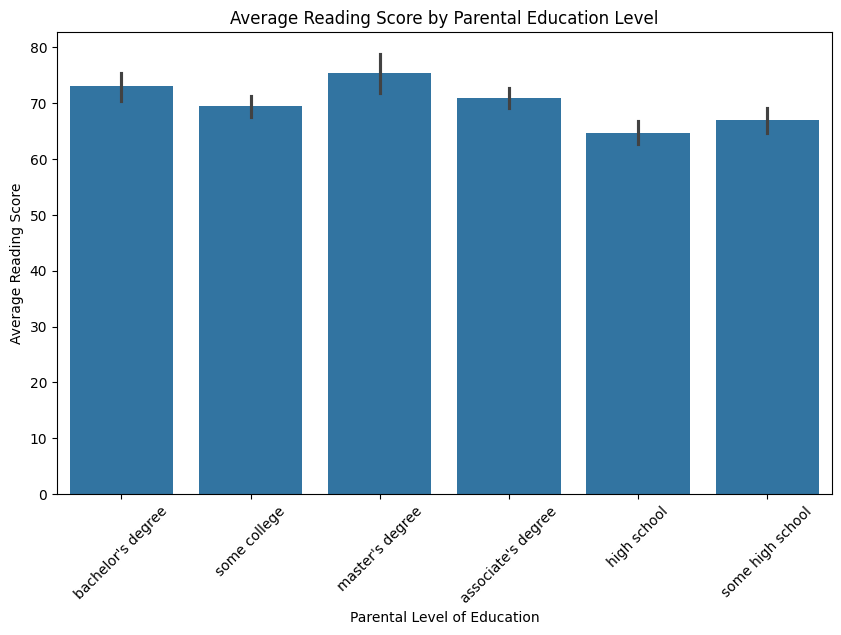

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='parental_level_of_education', y='reading_score', data=df)
plt.title('Average Reading Score by Parental Education Level')
plt.xticks(rotation=45)
plt.ylabel('Average Reading Score')
plt.xlabel('Parental Level of Education')
plt.show()


16. Make a scatter plot showing the relationship between reading and writing scores

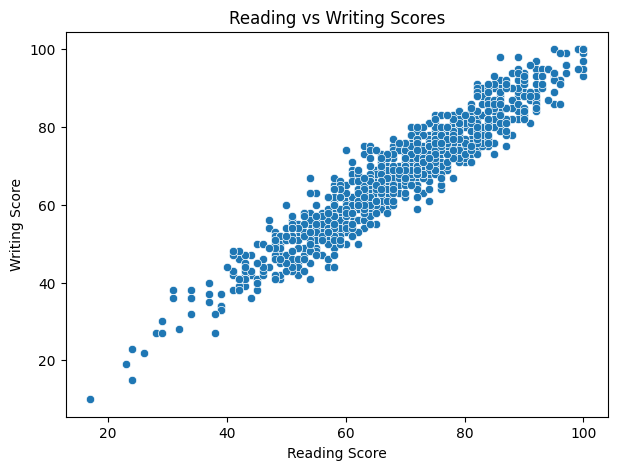

In [54]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='reading_score', y='writing_score', data=df)
plt.title('Reading vs Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()


17. Plot a countplot showing how many students completed the test preparation course vs those who didn’t

<ipython-input-55-854bd50a78bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='test_preparation_course', data=df, palette='pastel')


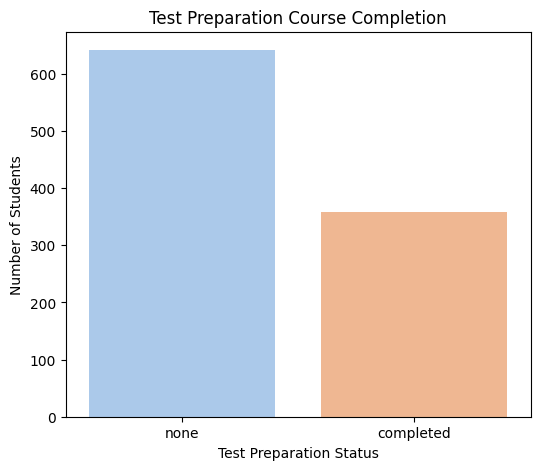

In [55]:
plt.figure(figsize=(6,5))
sns.countplot(x='test_preparation_course', data=df, palette='pastel')
plt.title('Test Preparation Course Completion')
plt.xlabel('Test Preparation Status')
plt.ylabel('Number of Students')
plt.show()
